In [1]:
#Code and data from the article "Black hole information turbulence and the Hubble tension"
#Copyright (C) 2025  Juan Luis Cabrera Fernández

#This project is licensed under the terms of the Attribution-NonCommercial-ShareAlike 4.0 International - Creative Commons licence (CC BY-NC-SA 4.0). 
# https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en

# JLCF: 22/01/2025 : This code builds Figure 1 and Figure 5

# Fig 1 from *Black holes information turbulence and cosmology*.

In [2]:
import Pkg; 

Pkg.add("Plots")
Pkg.add("DelimitedFiles")
Pkg.add("LaTeXStrings")
Pkg.add("JLD")
Pkg.add("DataFrames")
Pkg.add("CairoMakie")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


# Calculation of the coloured and lacunar densities

In [3]:
include("./darkcolored2.jl")

darkcolored (generic function with 1 method)

In [4]:
using Plots
using LaTeXStrings

# Last iteration is set to 17
gend = 17 
# Parameters defining alpha and beta (see citation [9])
a = 0.085
b = 1.9375 - 0.0225

l_size = zeros(Int64,gend);
e = zeros(Float64,gend);

# colored_energy counting
cec = zeros(Int64,gend);
# background_energy counting
bec = zeros(Int64,gend);

l_size, e, cec, bec = darkcolored(a,b,gend)
# Normalizing
LN = bec ./ (cec .+ bec); 
CN = cec ./ (cec .+ bec);

println("Filling normalized data arrays: BN = bec ./ (cec .+ bec) and CN = cec ./ (cec .+ bec)")

darkcolored(): deterministic, one realization
darkcolored() ....... a: 0.085 b: 1.915 r= a + b : 2.0
darkcolored() ....... Beta: 1.9575 Alpha: 0.4891443167305236
darkcolored() ....... gi: 3 gend: 17
 #output vector dimension: d: 129140163
Generation: 3 bias2: 1
..................................................... End g: 3
 
Number of non-zero values: N colored : 9
Number of zero values : N background : 18
Generation: 3 bias2: 3
Generation: 4 bias2: 1
..................................................... End g: 4
 
Number of non-zero values: N colored : 20
Number of zero values : N background : 61
Generation: 3 bias2: 9
Generation: 4 bias2: 3
Generation: 5 bias2: 1
..................................................... End g: 5
 
Number of non-zero values: N colored : 45
Number of zero values : N background : 198
Generation: 3 bias2: 27
Generation: 4 bias2: 9
Generation: 5 bias2: 3
Generation: 6 bias2: 1
..................................................... End g: 6
 
Number of non-zero

In [5]:
# Just checking results. Comment if needed
l_size, e, cec, bec 

([8.6093442e7 5.7395627e7 … 331416.0 744685.0], [2.4745892033961248e8 6.321927583926682e8 … 8.587047846337821e15 8.678825331260299e16], [2, 4, 9, 20, 45, 101, 227, 510, 1146, 2575, 5786, 13001, 29213, 65641, 147494, 331416, 744685], [1, 5, 18, 61, 198, 628, 1960, 6051, 18537, 56474, 171361, 518440, 1565110, 4717328, 14201413, 42715305, 128395478])

In [6]:
# This is what we expect to obtain
#l_size, e, cec, bec 
# ([8.6093442e7 5.7395627e7 … 331416.0 744685.0], 
# [2.4745892033961248e8 6.321927583926682e8 … 8.587047846337821e15 8.678825331260299e16], 
# [2, 4, 9, 20, 45, 101, 227, 510, 1146, 2575, 5786, 13001, 29213, 65641, 147494, 331416, 744685], 
# [1, 5, 18, 61, 198, 628, 1960, 6051, 18537, 56474, 171361, 518440, 1565110, 4717328, 14201413, 42715305, 128395478])

In [7]:
# No problem repeating 
gend = 17 
x = collect(1:1:gend);
y = LN;

In [8]:
# Reading the 25000 X 17 size matrix of posterior fits for the LCDM 
using JLD

posteriorLCDM = load("./posteriorLCDM.jld","M");

In [9]:
# Converting as a DataFrame
using DataFrames

df = DataFrame(posteriorLCDM', :auto);

In [10]:
# and deleting to save memory
posteriorLCDM = nothing;

In [11]:
# sorting according to column 17 (with the max value of each fitting)
df = sort!(df,:x17, rev=true);

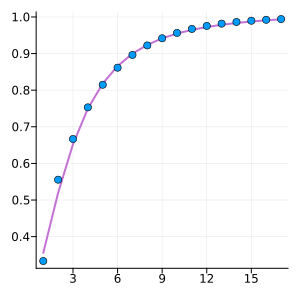

In [12]:
# Arbitrary selection of a fitting from the posterior distribution. Selecting row 7
# This is the fitting shown in figure 1
using Plots

plot(collect(df[7,:]), color=4, linewidth = 2)
scatter!(x, y; label="", color=1, legend=:false,tick_direction=:out,size=(300,300))

# Next: calculating the fractal.

In [13]:
# Next calculate the fractal array. 
# This is the core fractal calculation. 
# Note that to obtain the -5/3 at [9] the same calculation must be repeated until a moving final generation.  
include("./cascadas_fractal3.jl")

cascadas_fractal (generic function with 1 method)

In [14]:
# These are the value of the parameters a and b for r=r_Hopf. Do not change. See citation [9] (!)
a = 0.085
b = 1.9375 - 0.0225
# The figure uses 10 generations
nrows = gend =  10; 

fractal = cascadas_fractal(a,b,gend);

 
cascadas_fractal(a,b,gend) : calculates the fractal cascade :
 
gend is the total number of generations
 
#first coding: deterministic, one realization
cascadas_fractal() ....... a: 0.085 b: 1.915 r= a + b : 2.0
cascadas_fractal() ....... Beta: 1.9575 Alpha: 0.4891443167305236
cascadas_fractal() ....... gi: 3 gend: 10
 Deterministic running, r1: 2.0
Dimension: d=3^g : 59049
Generación: 3 bias2: 2187
Generación: 4 bias2: 729
Generación: 5 bias2: 243
Generación: 6 bias2: 81
Generación: 7 bias2: 27
Generación: 8 bias2: 9
Generación: 9 bias2: 3
Generación: 10 bias2: 1
cascadas_fractal(): finished. exit ...
 


# Building Figure 1. 

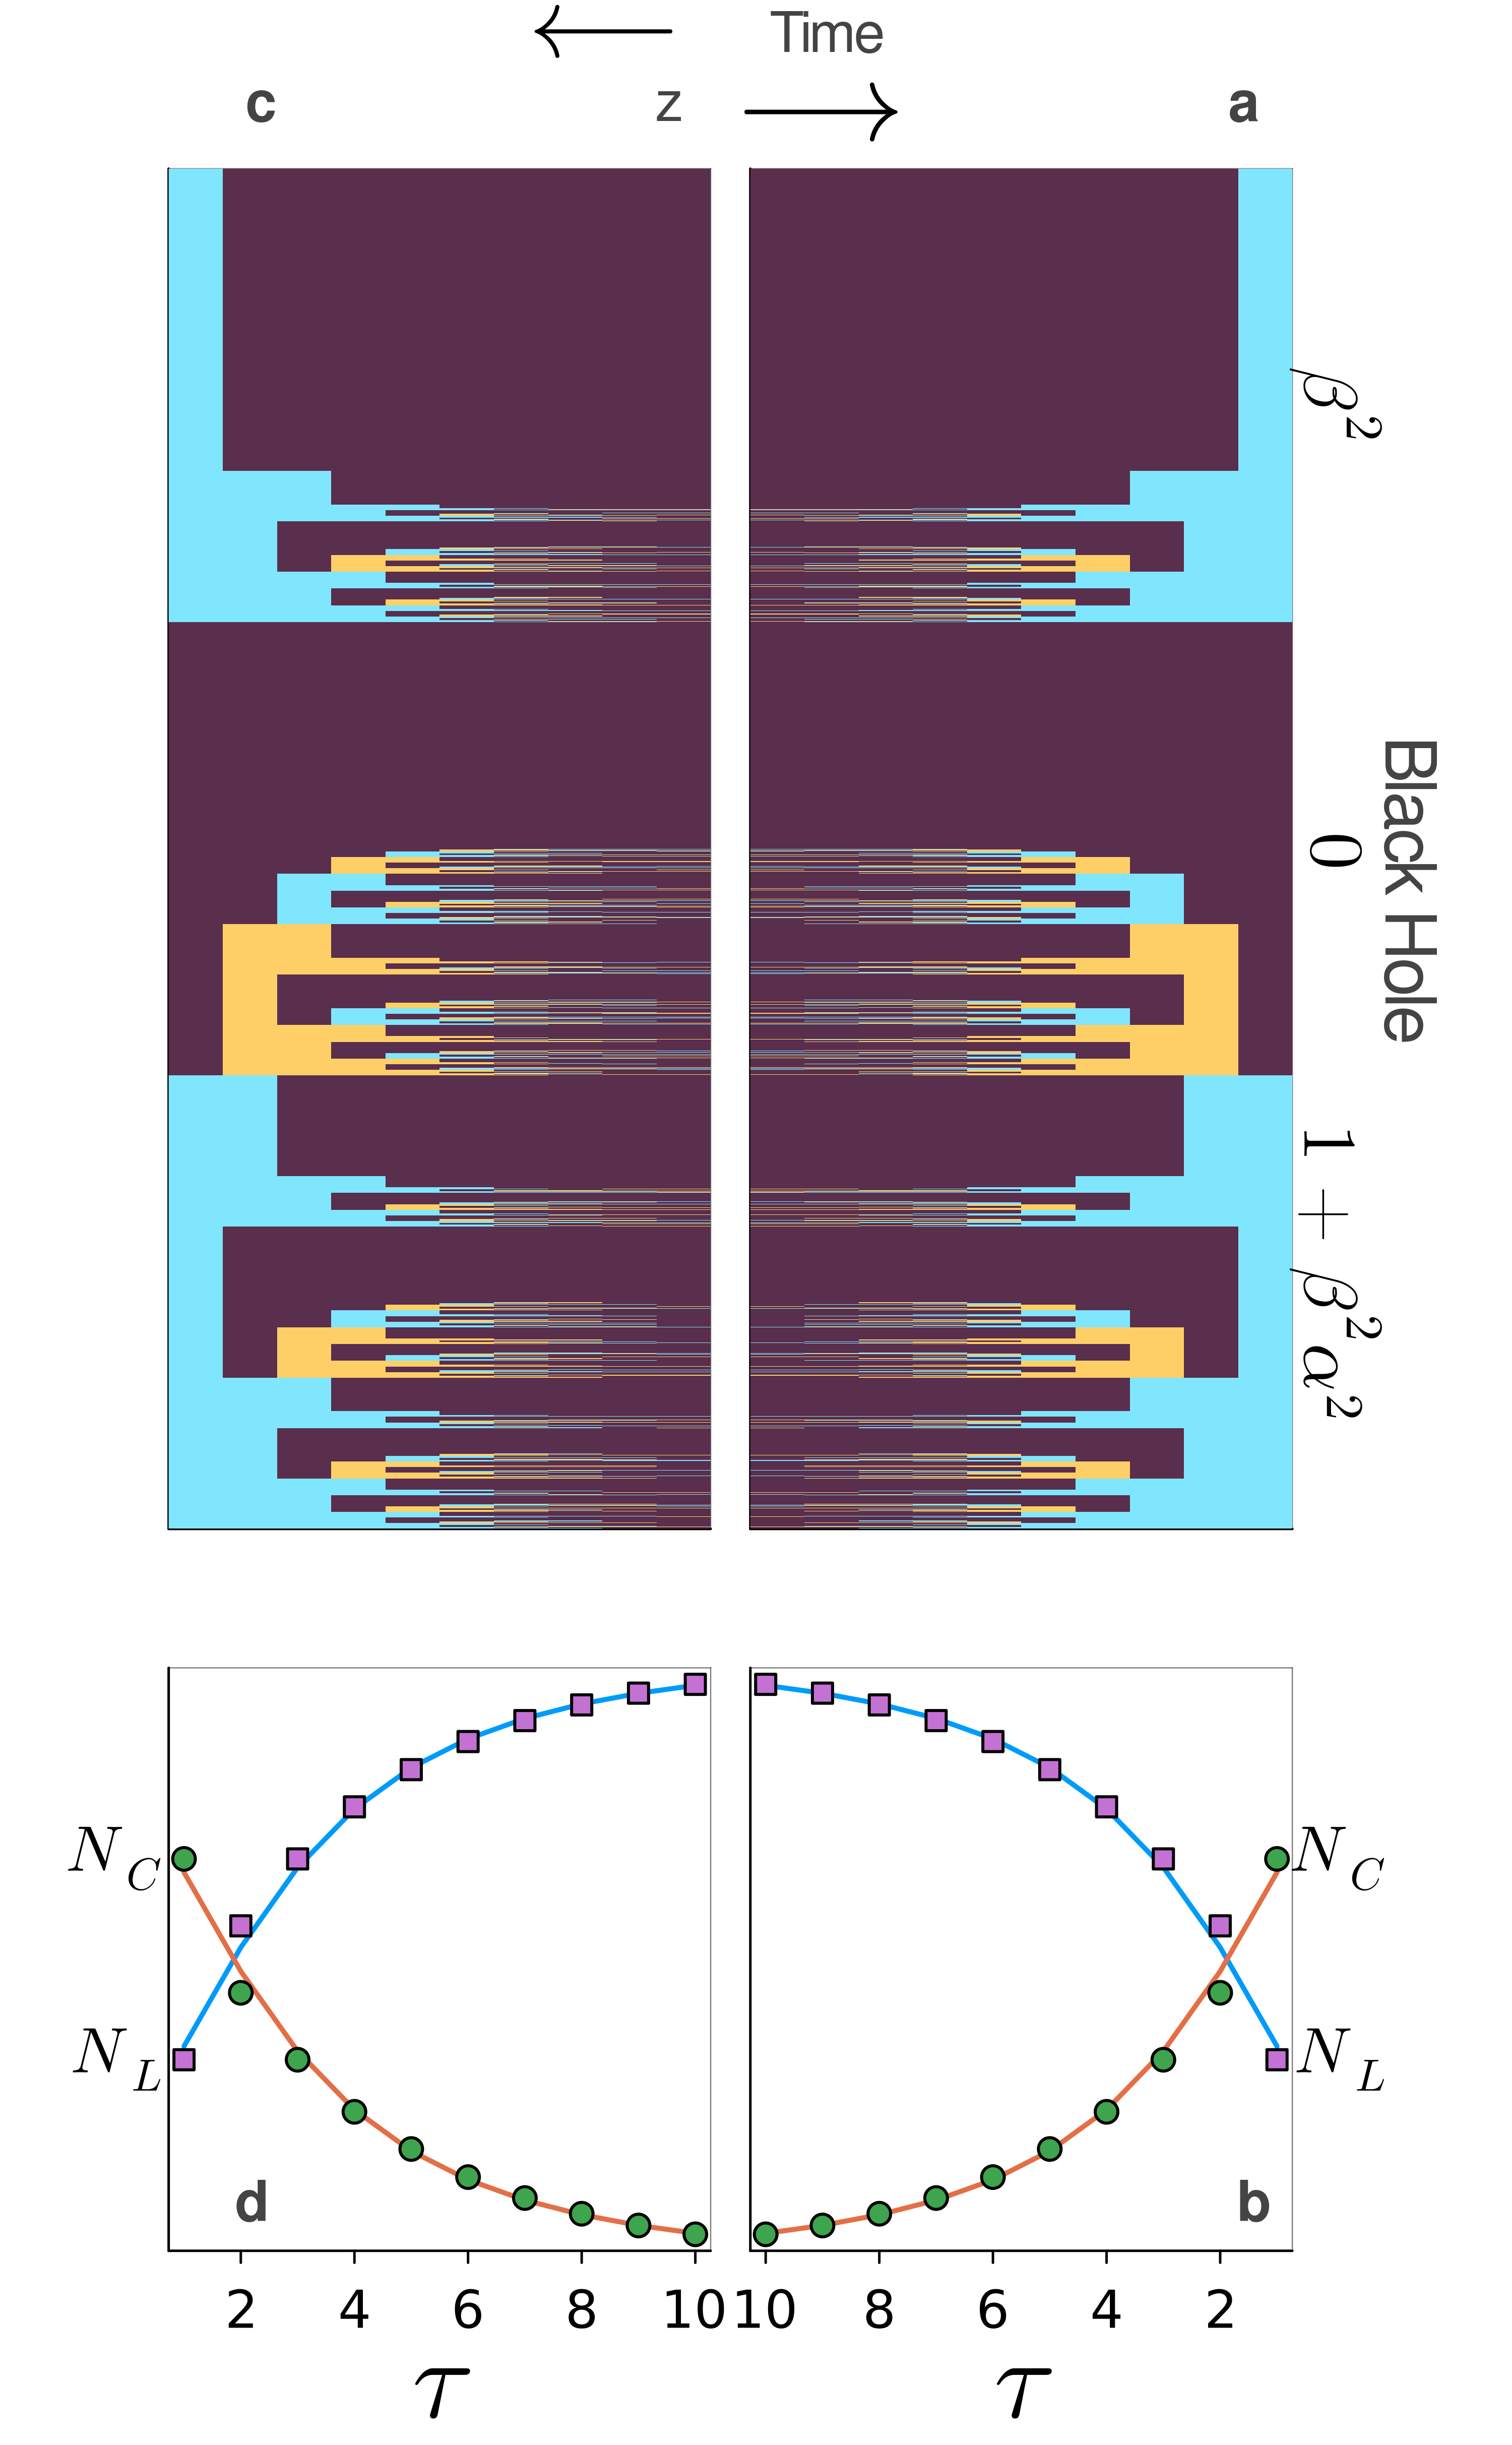

In [15]:
using Plots, Plots.Measures, LaTeXStrings
CAPITALS=0

dx=500*1.2
dy=floor(Int,1.618*dx)

plot_font = "Helvetica"
default(fontfamily=plot_font, framestyle=:box, xtickfont=font(14), ytickfont=font(14), guidefont=font(20), grid=false)

nota1 = string.(L"N_L") 
nota2 = string.(L"N_C") 
if CAPITALS == 1
    notaA = string.("A") 
    notaB = string.("B") 
    notaC = string.("C") 
    notaD = string.("D") 
else
    notaA = string.("a") 
    notaB = string.("b") 
    notaC = string.("c") 
    notaD = string.("d") 
end

p1 = Plots.heatmap(fractal', color=:managua10, yflip=false, size=(dx,dy), 
    clims=(-.0000002,.0000002), colorbar=false, framestyle=:semi, xticks=:false, ytick=:false)
    Plots.annotate!(10.5, 6.5*10^4, Plots.text(L"\longleftarrow", :black, :right, 27, rotation = 0))
    Plots.annotate!(10, 6.2*10^4, Plots.text("z", :black, :right, 24, rotation = 0, "Helvetica"))
    annotate!(2.5, 6.2*10^4, Plots.text(notaC, :black, :right, 24, "Helvetica Bold"))

p2 = Plots.heatmap(fractal', color=:managua10, xflip=true, size=(dx,dy), 
    clims=(-.0000002,.0000002), colorbar=false,
    framestyle=:semi, xticks=[], ytick=:false)
    Plots.annotate!(-0.3, 0.45*10^4, Plots.text(L"1 + \beta^2 \alpha^2", :black, :right, 20, rotation = 270))
    Plots.annotate!(-0.3, 2.85*10^4, Plots.text(L"0", :black, :right, 20, rotation = 270))
    Plots.annotate!(-0.3, 4.7*10^4, Plots.text(L"\beta^2", :black, :right, 20, rotation = 270))
    Plots.annotate!(-1.7, 2.1*10^4, Plots.text("Black Hole", :black, :right, 30, rotation = 270, "Helvetica"))

    Plots.annotate!(8, 6.5*10^4, Plots.text("Time", :black, :right, 24, rotation = 0, "Helvetica"))
    Plots.annotate!(7, 6.15*10^4, Plots.text(L"\longrightarrow", :black, :right, 30, rotation = 0))
    annotate!(1.1, 6.2*10^4, Plots.text(notaA, :black, :right, 24, "Helvetica Bold"))

#redefino xdata para cubrir la dimension del fractal 
window = gend;
xdata=collect(1:1:window)

p3 = Plots.plot(collect(df[7,1:window]), legend=:false, framestyle=:box, yticks=[0,1], linewidth = 2)
    Plots.plot!( 1 .- collect(df[7,1:window]), linewidth = 2 )
    Plots.scatter!(CN[1:window], markersize = 5)
    Plots.scatter!(LN[1:window], marker = :square,  xguidefontsize=30)
    Plots.xlabel!(L"\tau")
    annotate!(0.7, LN[1], Plots.text(nota1, :black, :right, 17))
    annotate!(0.7, CN[1], Plots.text(nota2, :black, :right, 17))
    annotate!(2.5, 0.1, Plots.text(notaD, :black, :right, 24, "Helvetica Bold"))

p4 = Plots.plot(collect(df[7,1:window]), legend=:false,framestyle=:box,xflip=:true, yticks=[], linewidth = 2)
    Plots.plot!(1 .- collect(df[7,1:window]) , xflip=:true,framestyle=:box, linewidth = 2)
    Plots.scatter!(CN[1:window],xflip=:true,framestyle=:box,linewidth = 2, markersize = 5)
    Plots.scatter!(LN[1:window],marker = :square,framestyle=:box, linewidth = 2, xguidefontsize=30)
    Plots.xlabel!(L"\tau")
    annotate!(-1, LN[1], Plots.text(nota1, :black, :right, 17))
    annotate!(-1, CN[1], Plots.text(nota2, :black, :right, 17))
    annotate!(1.1, 0.1, Plots.text(notaB, :black, :right, 24, "Helvetica Bold"))

l = @layout [ [a{0.7h,0.45w} b{0.7h, 0.45w} ]; [c{0.3h, 0.45w} c{0.3h, 0.45w}] ]

Plots.plot( p1, p2, p3, p4, layout=l,
        left_margin=[15mm -10mm], right_margin=[10mm 8mm], top_margin=[15mm -10mm], bottom_margin=[-40mm -5mm], 
        dpi=500,size=(dx,dy), framestyle=:semi, xtick_direction=:out, ytick_direction=:out)

In [16]:
# Save it if you like
#savefig("./fig1.pdf");
#or
#savefig("./fig1.png");

# Building Figure 2.

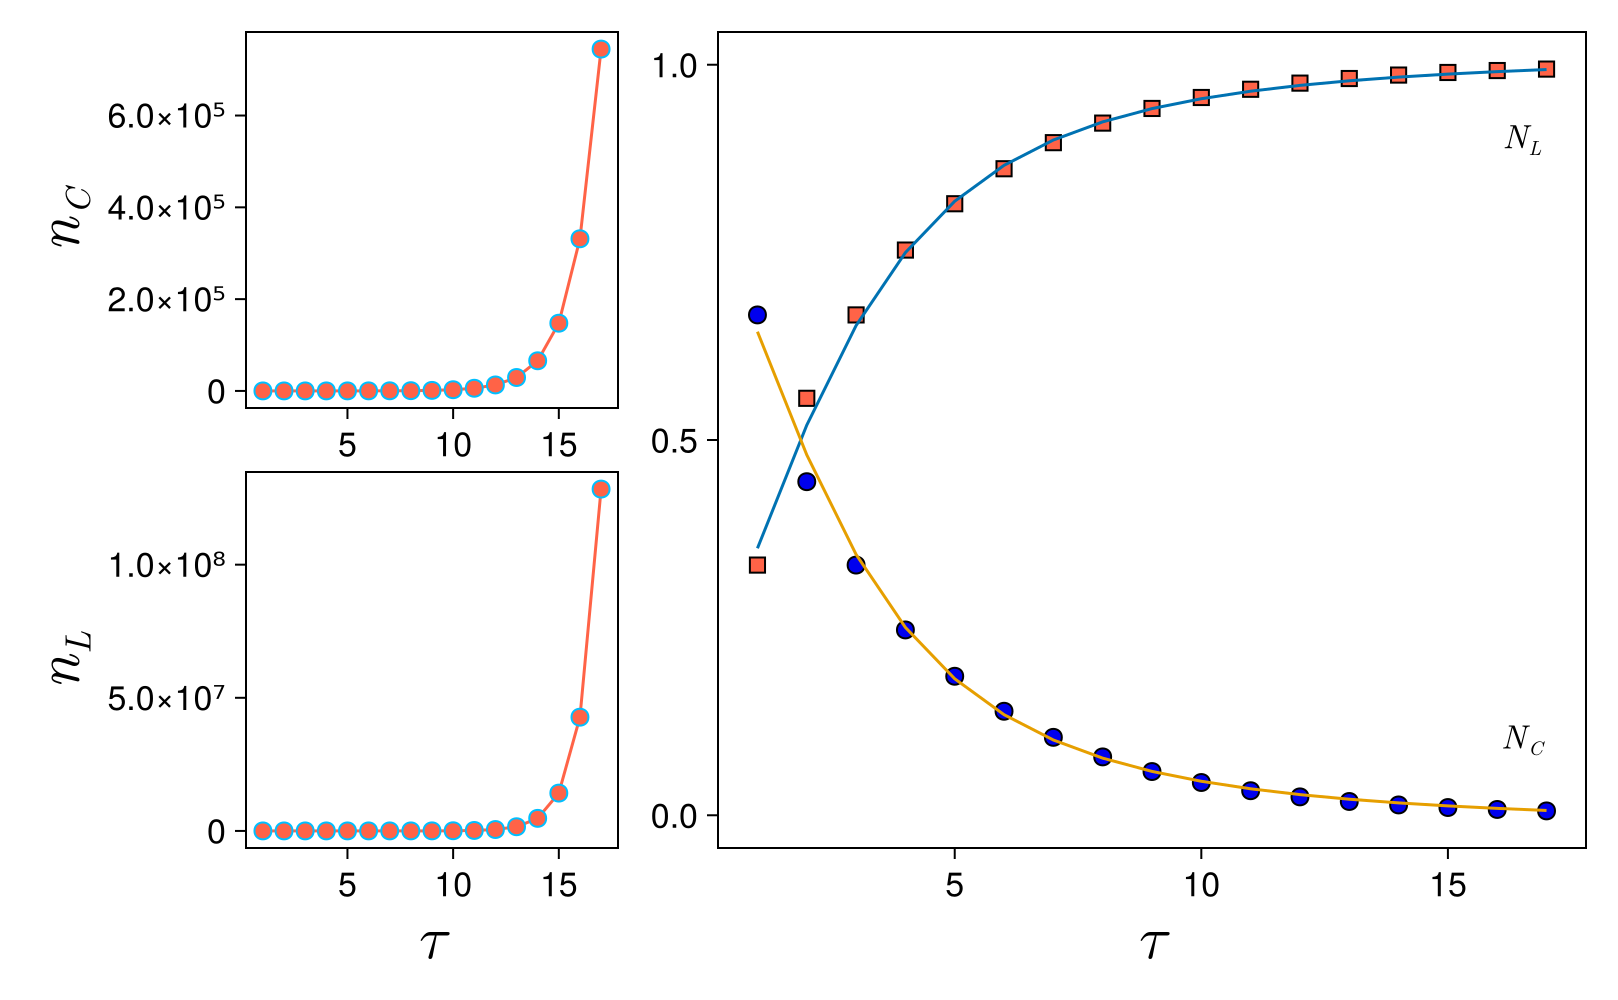

In [17]:
using CairoMakie
gend=17
dy=500*1
dx=floor(Int,1.618*dy)
Makie.to_font("Helvetica")
fig = Figure(size =(dx,dy), fontsize = 17)#, fonts = ("Helvetica"))#, fontsize = 17, fonts = ("Helvetica"))

kwargs = (; markersize = 12, strokewidth = 1, strokecolor = :deepskyblue, color=:cian)#deepskyblue)
kwargs2 = (; markersize = 12, strokewidth = 1)


ax1 = Axis(fig[1, 1]; xgridvisible = false, ygridvisible = false, ylabel = L"n_C", xlabel = " ",ylabelsize=30)
#hidedecorations!(ax1)
ax2 = Axis(fig[2, 1]; xgridvisible = false, ygridvisible = false, ylabel = L"n_L", xlabel = L"\tau",ylabelsize=30,xlabelsize=30)
ax3 = Axis(fig[1:2, 2]; xgridvisible = false, ygridvisible = false, ylabel = " ", xlabel = L"\tau",xlabelsize=30)
#linkxaxes!(ax1, ax2)
rowgap!(fig.layout, 5)


# Add your plots to each axis
CairoMakie.scatterlines!(ax1, cec[1:gend];  kwargs..., color = :tomato, marker = :circle)
CairoMakie.scatterlines!(ax2, bec[1:gend];  kwargs..., color = :tomato, marker = :circle)
CairoMakie.scatter!(ax3, CN[1:gend]; kwargs2..., color =:blue2, marker = :circle)
#lines!(ax3, xdata, modelB(xdata, fitB.param))
CairoMakie.scatter!(ax3,LN[1:gend];  kwargs2...,  color = :tomato, marker = :rect)
#lines!(ax3, xdata, 1 .- modelB(xdata, fitB.param) )

lines!(ax3, 1:gend,collect(df[7,1:gend]) )
lines!(ax3, 1:gend, 1 .- collect(df[7,1:gend]) )

text!(L"N_C", position = (16.5, 0.1), align = (:center, :center))#, textsize = 25)
text!(L"N_L", position = (16.5, 0.9), align = (:center, :center))#, textsize = 25)



# Adjust layout
colsize!(fig.layout, 1, Relative(0.3))
rowsize!(fig.layout, 1, Relative(0.5))
rowsize!(fig.layout, 2, Relative(0.5))

fig


In [18]:
# Save it if you like
#CairoMakie.save("./fig5.png", fig)
